#**Retail sales forecasting model**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preparation** - Gathering tha data from muliple tables

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [4]:
df1=pd.read_csv('/content/drive/MyDrive/Data science Internship/dataset/Features data set.csv')
df2=pd.read_csv('/content/drive/MyDrive/Data science Internship/dataset/sales data-set.csv')
df3=pd.read_csv('/content/drive/MyDrive/Data science Internship/dataset/stores data-set.csv')

In [5]:
df1.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [6]:
df1.tail(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8180,45,24/05/2013,67.11,3.627,3249.34,481.82,58.48,1183.23,1309.30,NaN,NaN,False
8181,45,31/05/2013,65.88,3.646,6474.49,411.38,77.06,9.38,4227.27,NaN,NaN,False
8182,45,07/06/2013,70.71,3.633,9977.82,744.29,80.00,4825.71,3597.34,NaN,NaN,False
8183,45,14/06/2013,70.01,3.632,2471.44,517.87,348.54,2612.33,3459.39,NaN,NaN,False
8184,45,21/06/2013,70.13,3.626,4989.34,385.31,178.56,2463.42,3117.94,NaN,NaN,False
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [7]:
df1.shape

(8190, 12)

In [8]:
df1.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
df1.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
df1.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [12]:
df2.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [13]:
df2.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421560,45,98,24/08/2012,415.40,False
421561,45,98,31/08/2012,346.04,False
421562,45,98,07/09/2012,352.44,True
421563,45,98,14/09/2012,605.96,False
421564,45,98,21/09/2012,467.30,False
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [14]:
df2.shape

(421570, 5)

In [15]:
df2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
df2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [17]:
df3.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [18]:
df3.shape

(45, 3)

#**Data cleaning** - Cleaning and preparing the data

In [19]:
df1.shape

(8190, 12)

In [20]:
# Assuming df1 is your DataFrame
df1.dropna(subset=['CPI', 'Unemployment'], inplace=True)

In [21]:
df1.shape

(7605, 12)

In [22]:
df1.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4156
MarkDown2       5164
MarkDown3       4521
MarkDown4       4631
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [23]:
df3.groupby('Type')['Size'].mean()

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

In [24]:
df=df2.merge(df1,how='left',indicator=True).merge(df3,how='left')

In [25]:
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
5,1,1,12/03/2010,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,both,A,151315
6,1,1,19/03/2010,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,both,A,151315
7,1,1,26/03/2010,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,both,A,151315
8,1,1,02/04/2010,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,both,A,151315
9,1,1,09/04/2010,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,both,A,151315


In [26]:
print('training_data duplicated:{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

training_data duplicated:0


In [27]:
df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True)

In [28]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [29]:
df['IsHoliday'].replace({False: 0, True: 1}, inplace=True)

In [30]:
df.loc[df['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,10/08/2012,-139.65,0,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,04/05/2012,-1.27,0,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,19/02/2010,-863.00,0,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,12/03/2010,-698.00,0,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,08/10/2010,-58.00,0,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,12/02/2010,-0.43,1,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,19/02/2010,-0.27,0,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,16/04/2010,-1.61,0,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,02/07/2010,-0.27,0,76.61,2.815,182.318780,8.743,both,B,118221


In [31]:
df3=df.loc[df['Weekly_Sales']>0]
df4=df3.drop(['_merge'],axis=1)

In [32]:
df4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
141436,15,25,01/04/2011,8286.62,0,30.34,3.811,134.068258,7.658,B,123737
44583,5,36,01/04/2011,428.00,0,61.50,3.524,215.402441,6.489,B,34875
398073,43,1,01/04/2011,6218.97,0,67.79,3.524,206.673311,10.581,C,41062
144369,15,52,01/04/2011,1758.09,0,30.34,3.811,134.068258,7.658,B,123737
269728,28,21,01/04/2011,5695.98,0,63.63,3.772,128.719935,13.736,A,206302
...,...,...,...,...,...,...,...,...,...,...,...
366442,39,42,31/12/2010,3531.46,1,52.45,2.943,210.182398,8.476,A,184109
122489,13,36,31/12/2010,1416.00,1,26.79,2.868,127.087677,7.795,A,219622
199598,21,16,31/12/2010,958.34,1,47.19,2.943,211.064774,8.163,B,140167
165826,17,83,31/12/2010,407.96,1,20.79,2.868,127.087677,6.885,B,93188


In [33]:
df4['year'] = pd.DatetimeIndex(df4['Date']).year #Separating year data.

In [34]:
df4.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year
0,1,1,05/02/2010,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010
1,1,1,12/02/2010,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,2010
2,1,1,19/02/2010,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,2010
3,1,1,26/02/2010,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,2010
4,1,1,05/03/2010,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,2010


In [35]:
df4['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [36]:
df4['month'] = pd.DatetimeIndex(df4['Date']).month #extract month data
df4['week'] = pd.DatetimeIndex(df4['Date']).week #extract week data

In [37]:
data=df4.drop(['Date'],axis=1)

In [38]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['IsHoliday']= label_encoder.fit_transform(data['IsHoliday'])
data['Type']= label_encoder.fit_transform(data['Type'])

data


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,5,17
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,12,48
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,5,19
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,12,50
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


#**Exploratory Data Analysis** - Exploring and Visualizing the data for general understanding and insights.

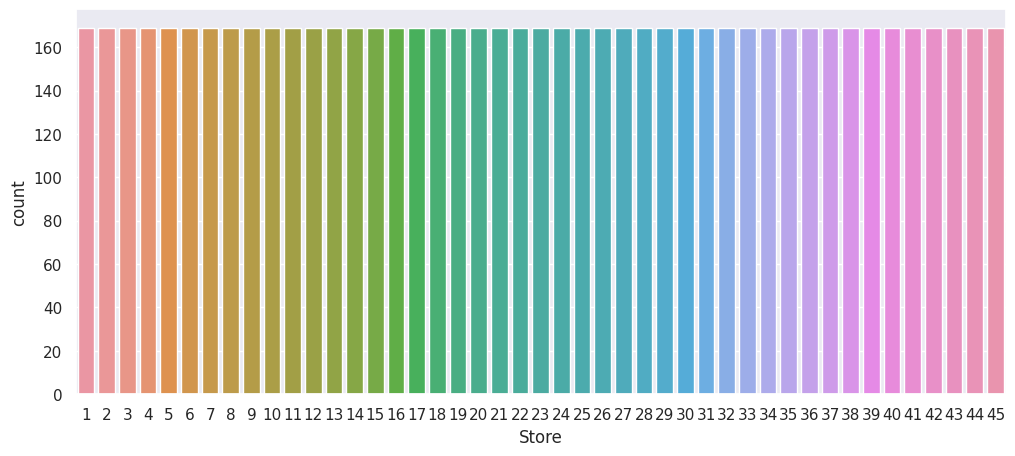

In [55]:
plt.figure(figsize=(12,5))
sns.countplot(x='Store', data=df1)
plt.show()

**Insight** - There are 45 Stores and they are spread across different regions equaly.

<Axes: >

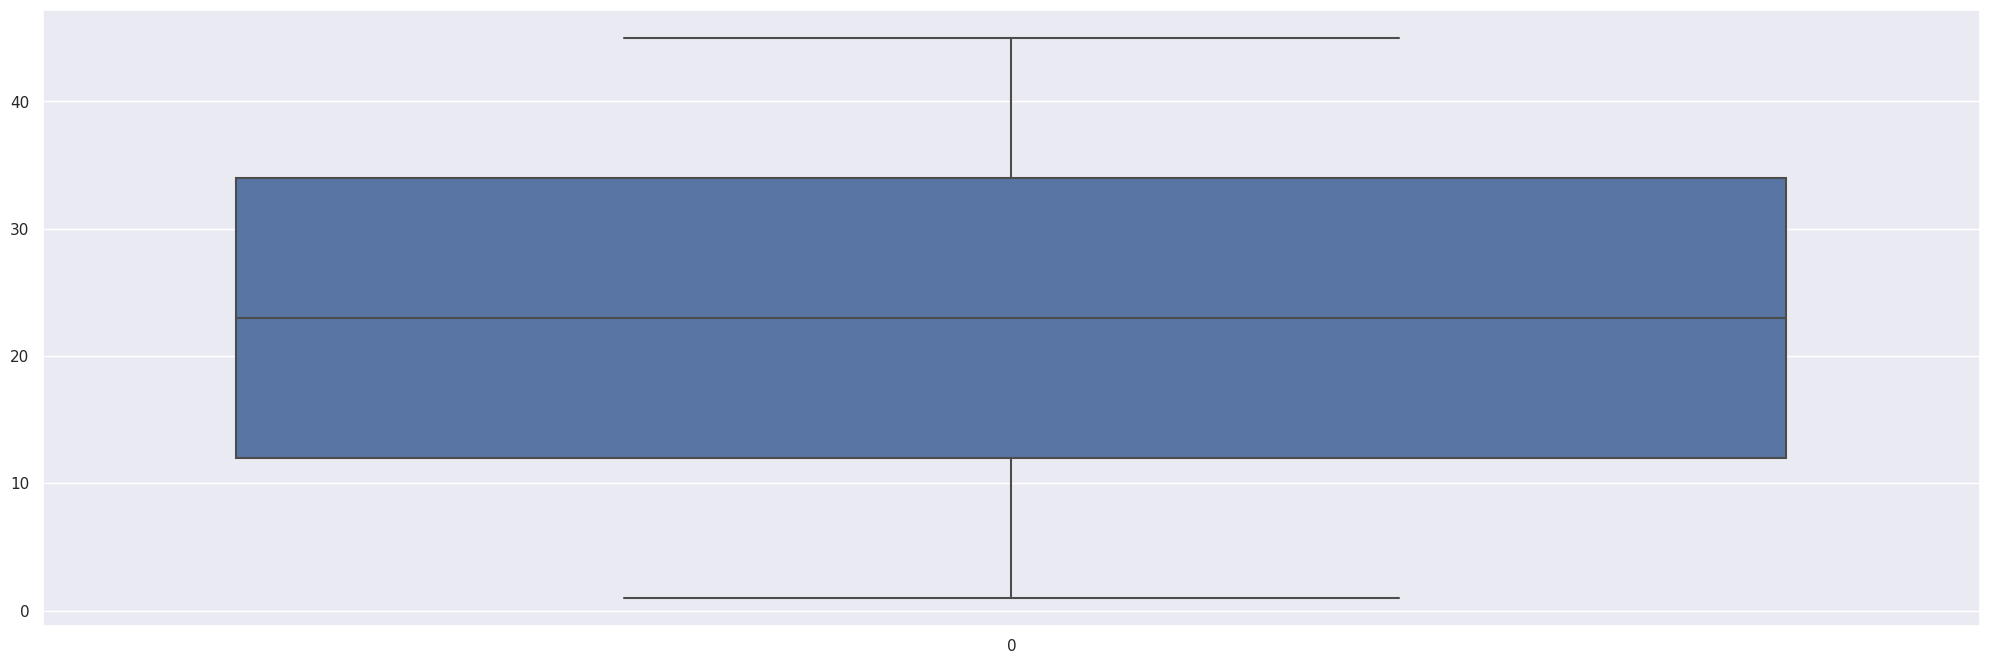

In [56]:
sns.boxplot(df1['Store'])

**Insight** - There are no outliers in the data.

<Axes: >

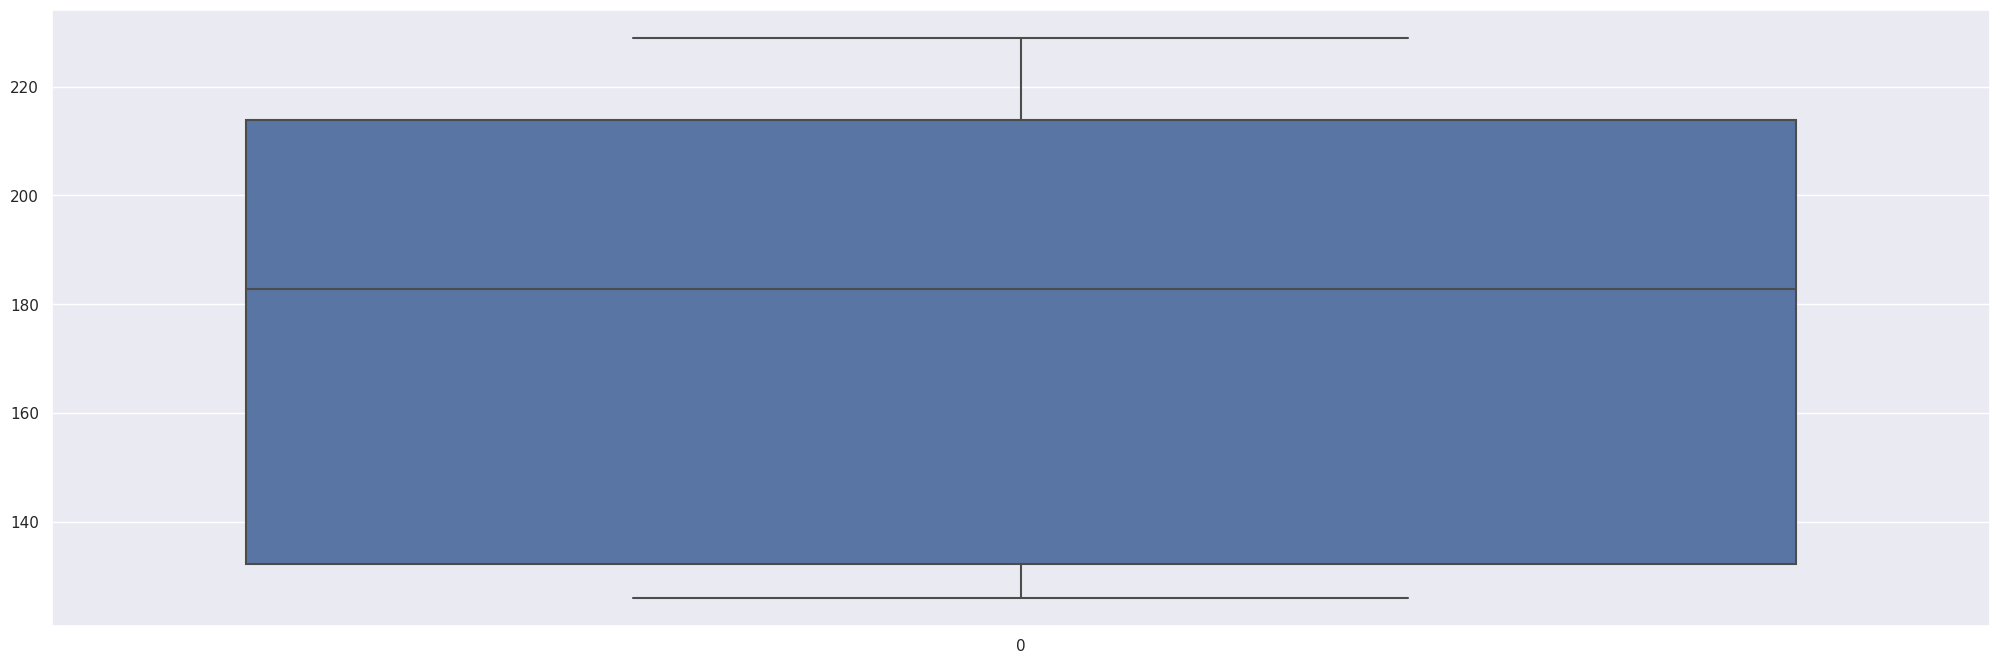

In [57]:
sns.boxplot(df1['CPI'])

Insight** - There are no outliers in the data.

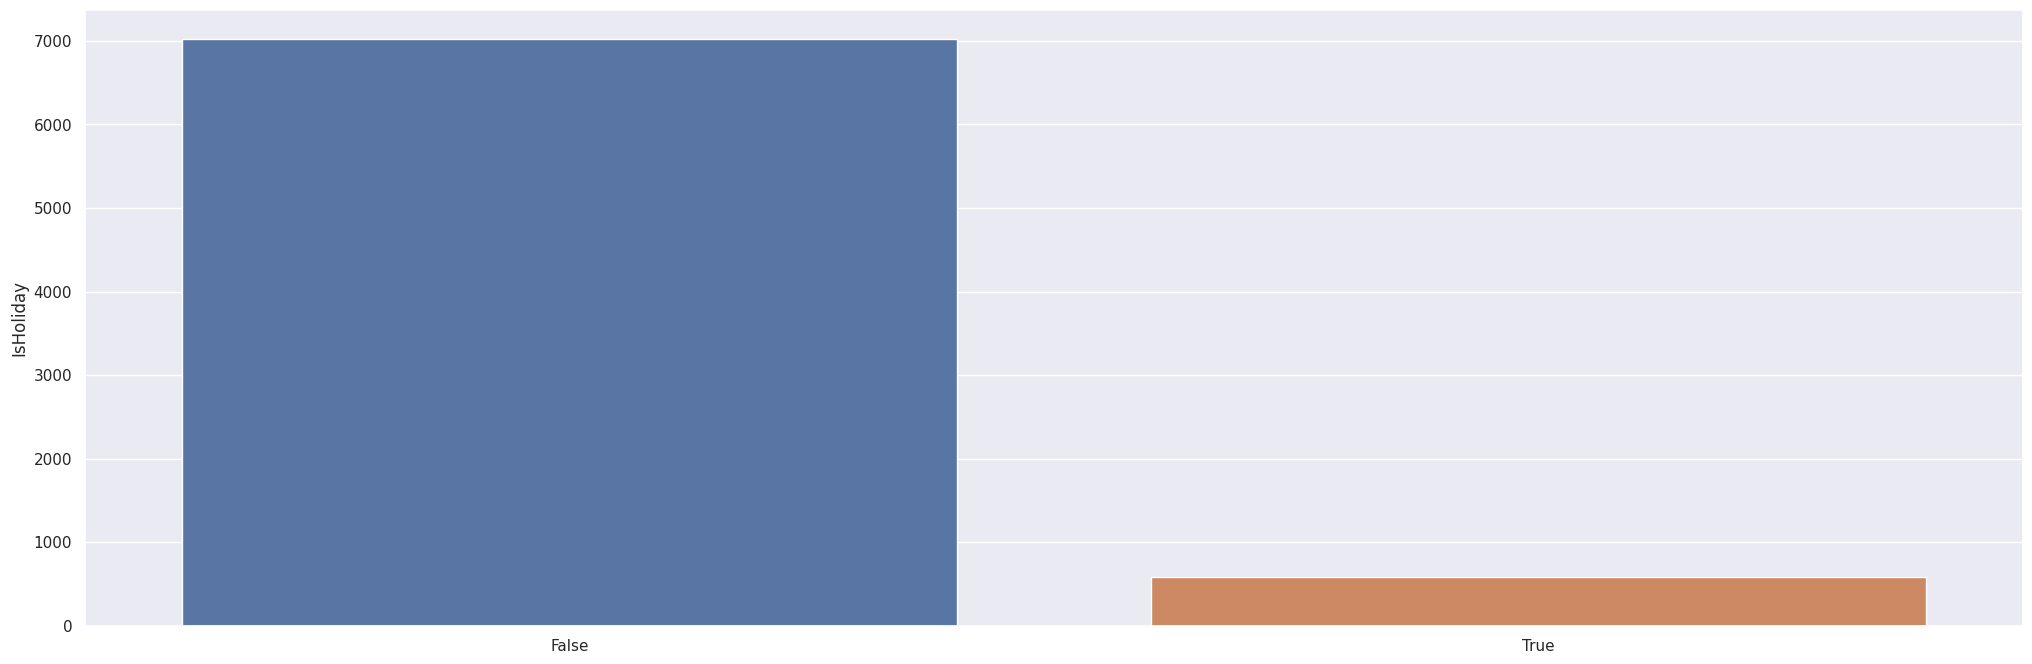

In [58]:
sns.barplot(x=df1['IsHoliday'].value_counts().index, y=df1['IsHoliday'].value_counts())
plt.show()

**Insight** - There working days are more and non-working days are less in the data.

<Axes: >

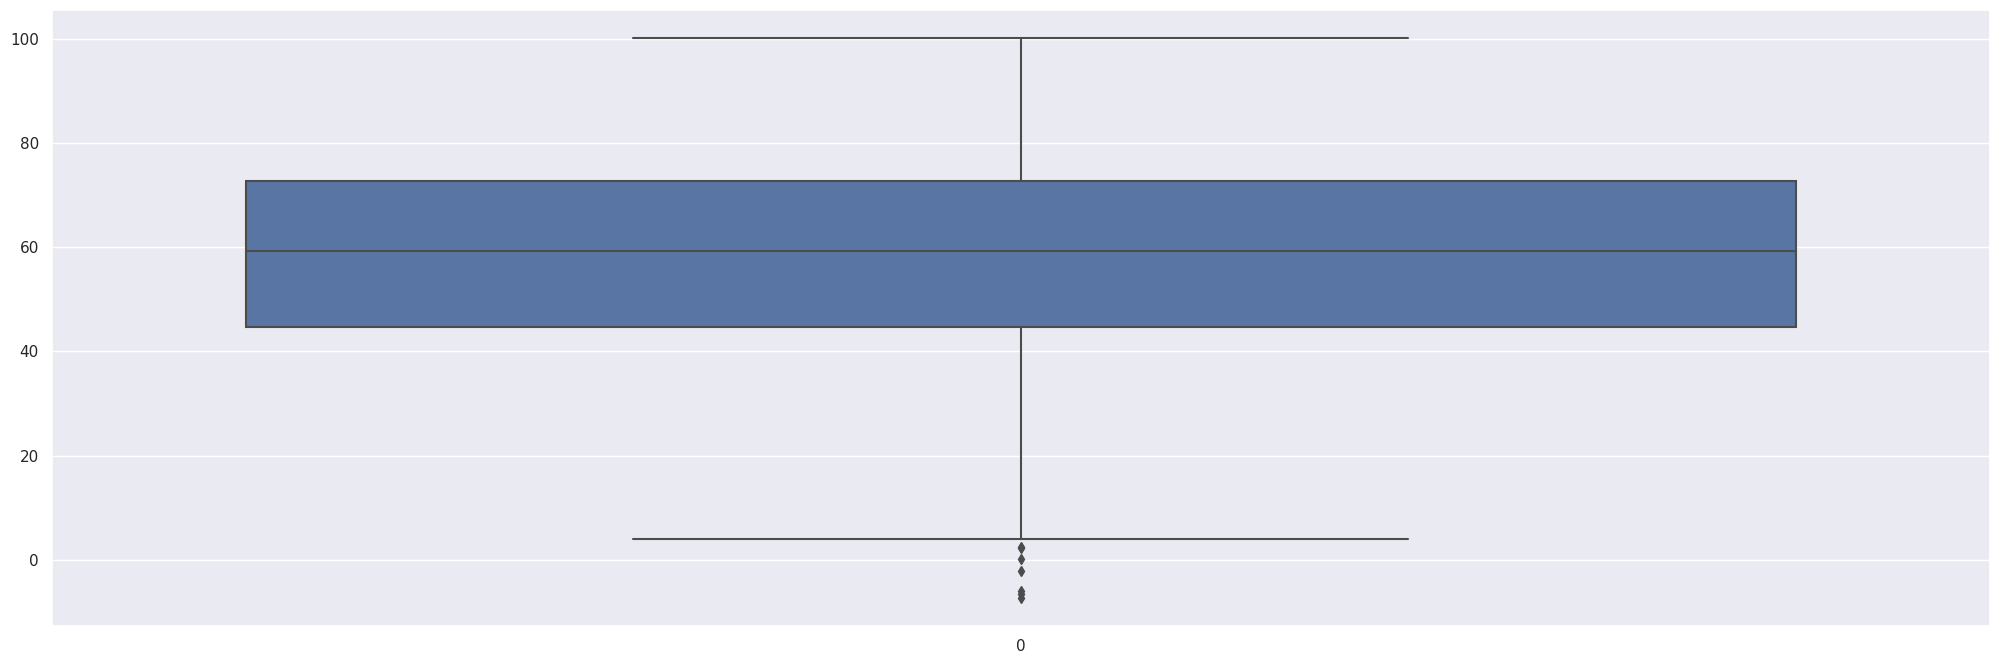

In [59]:
sns.boxplot(df1['Temperature'])

**Insight** - There are few outliers in the temperature Data seen in the boxplot and can be easily managed.

<Axes: >

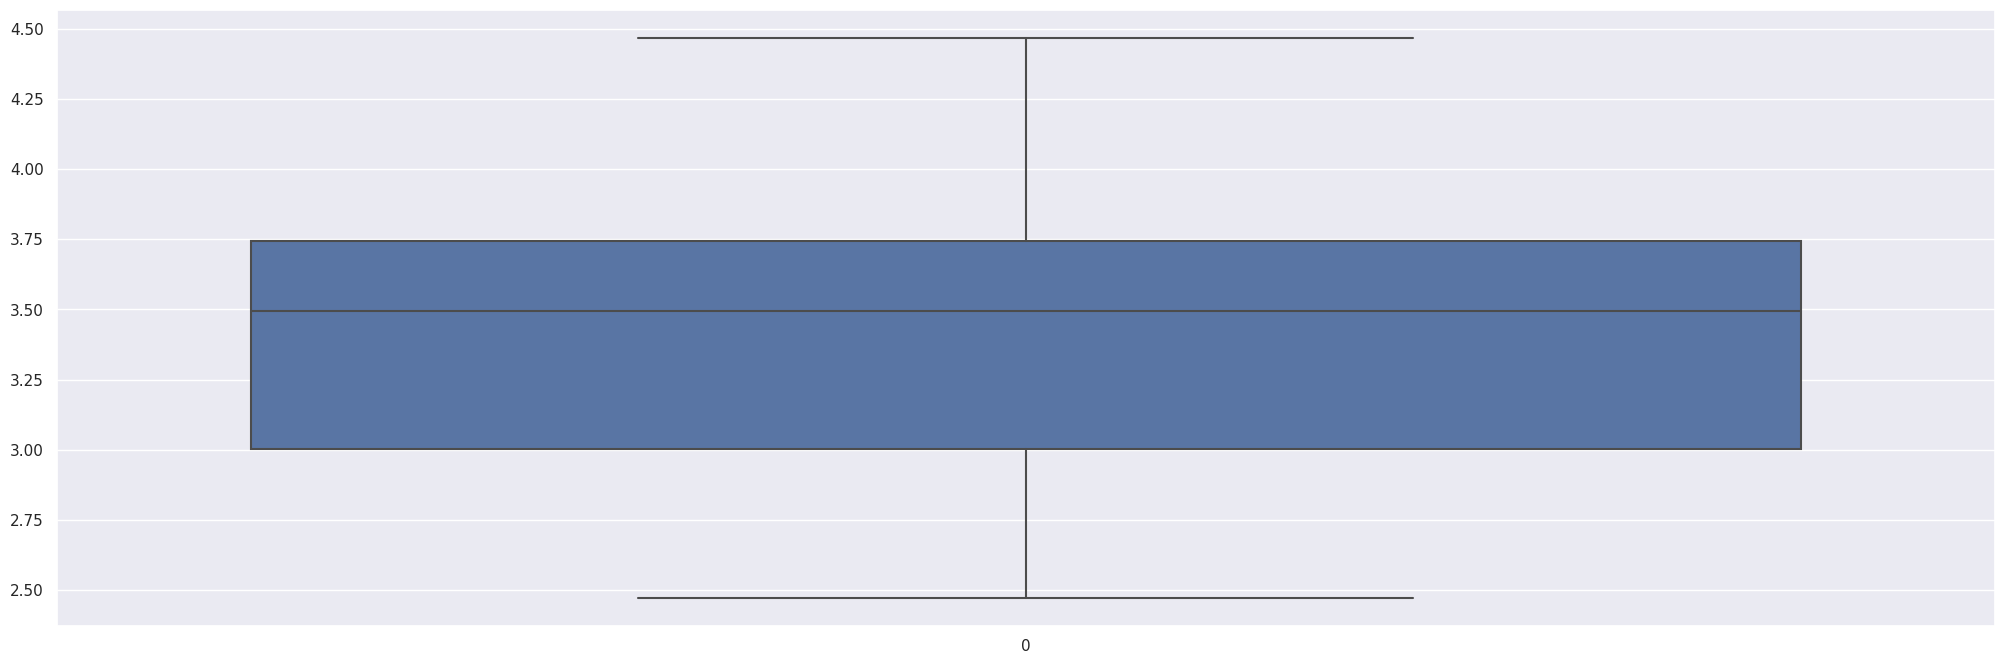

In [60]:
sns.boxplot(df1['Fuel_Price'])

**Insight** - There are no outliers in the data.

<Axes: >

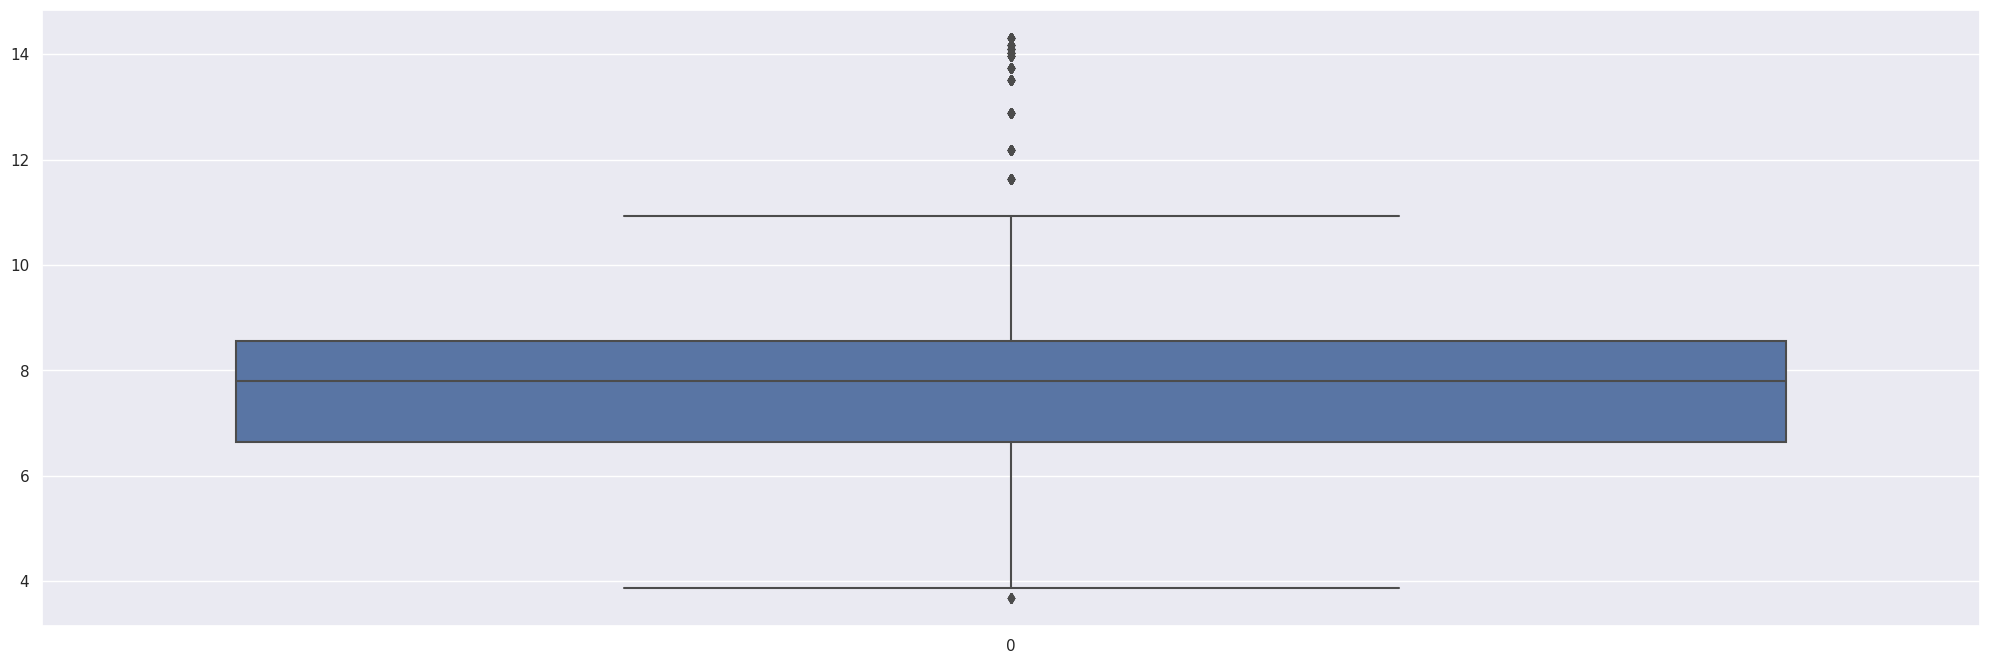

In [61]:
sns.boxplot(df1['Unemployment'])

**Insight** - There are few outliers in the data.

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

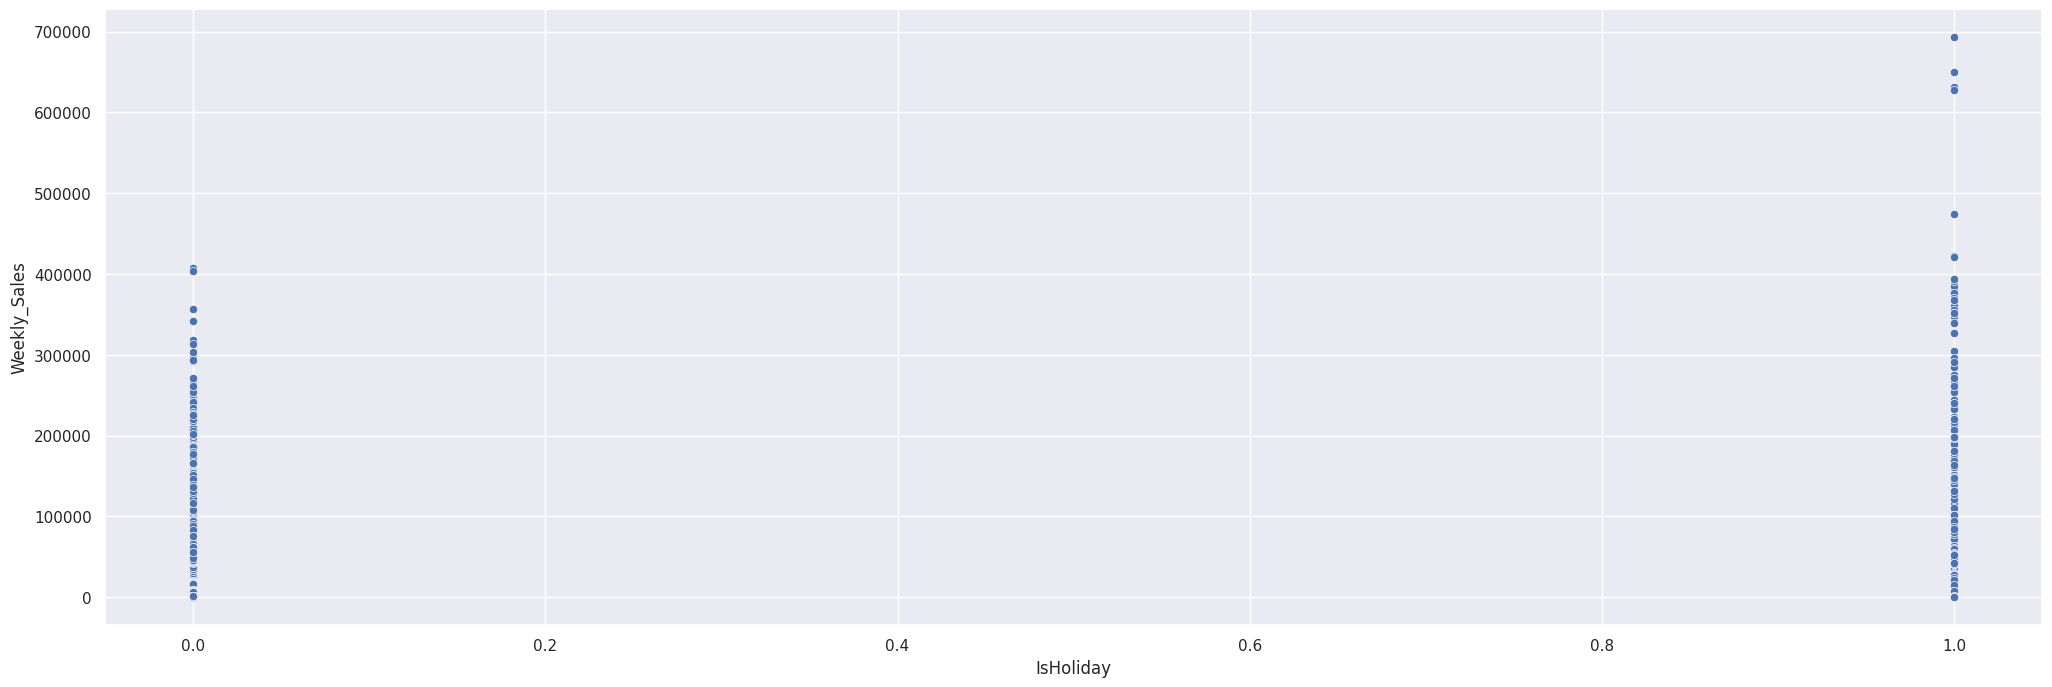

In [62]:
sns.scatterplot(x=data['IsHoliday'], y=data['Weekly_Sales'])

**Insight** - The holiday sales are more in the non-holiday sales.

<Axes: xlabel='Dept', ylabel='count'>

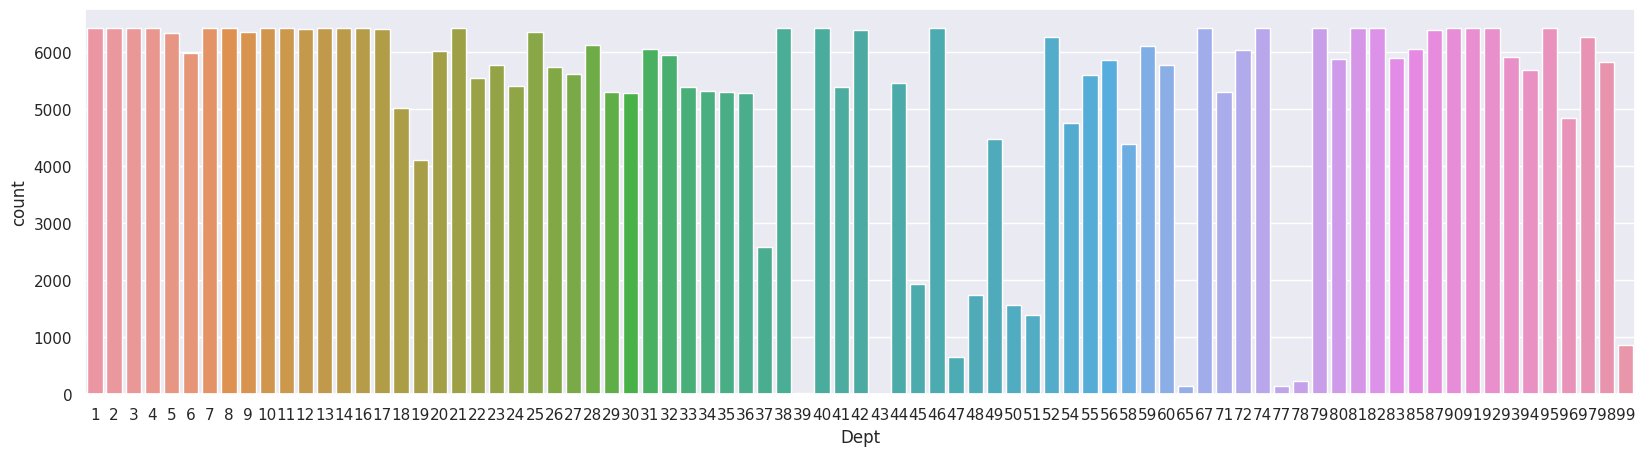

In [63]:
plt.figure(figsize=(20,5))
sns.countplot(x='Dept', data=df2)

<Axes: xlabel='Type', ylabel='count'>

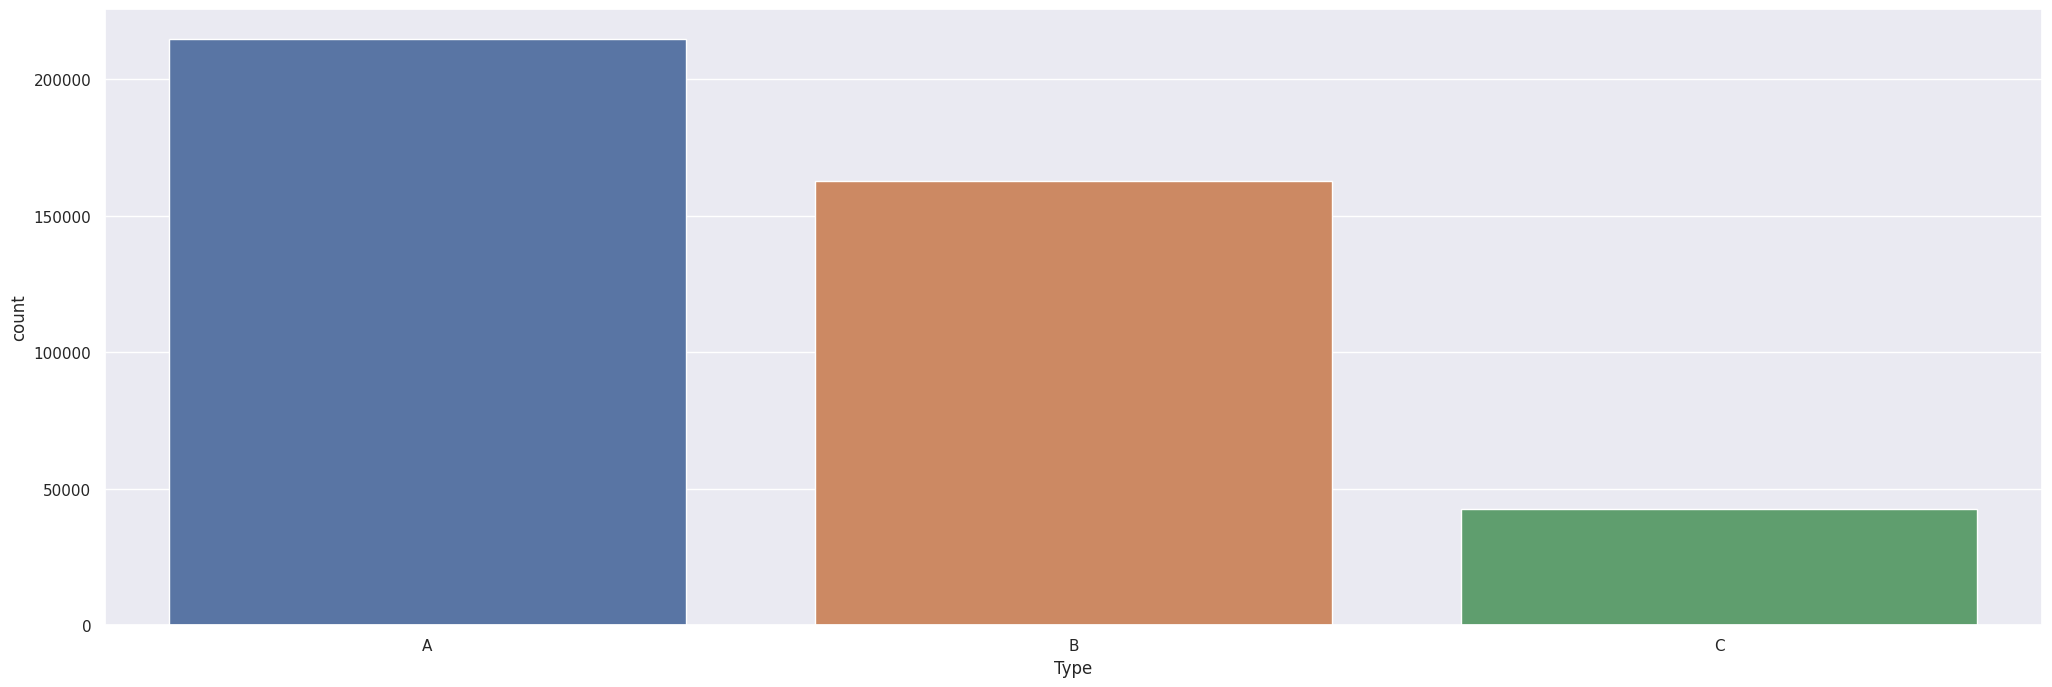

In [64]:
sns.countplot(x='Type', data=df3)

<Axes: >

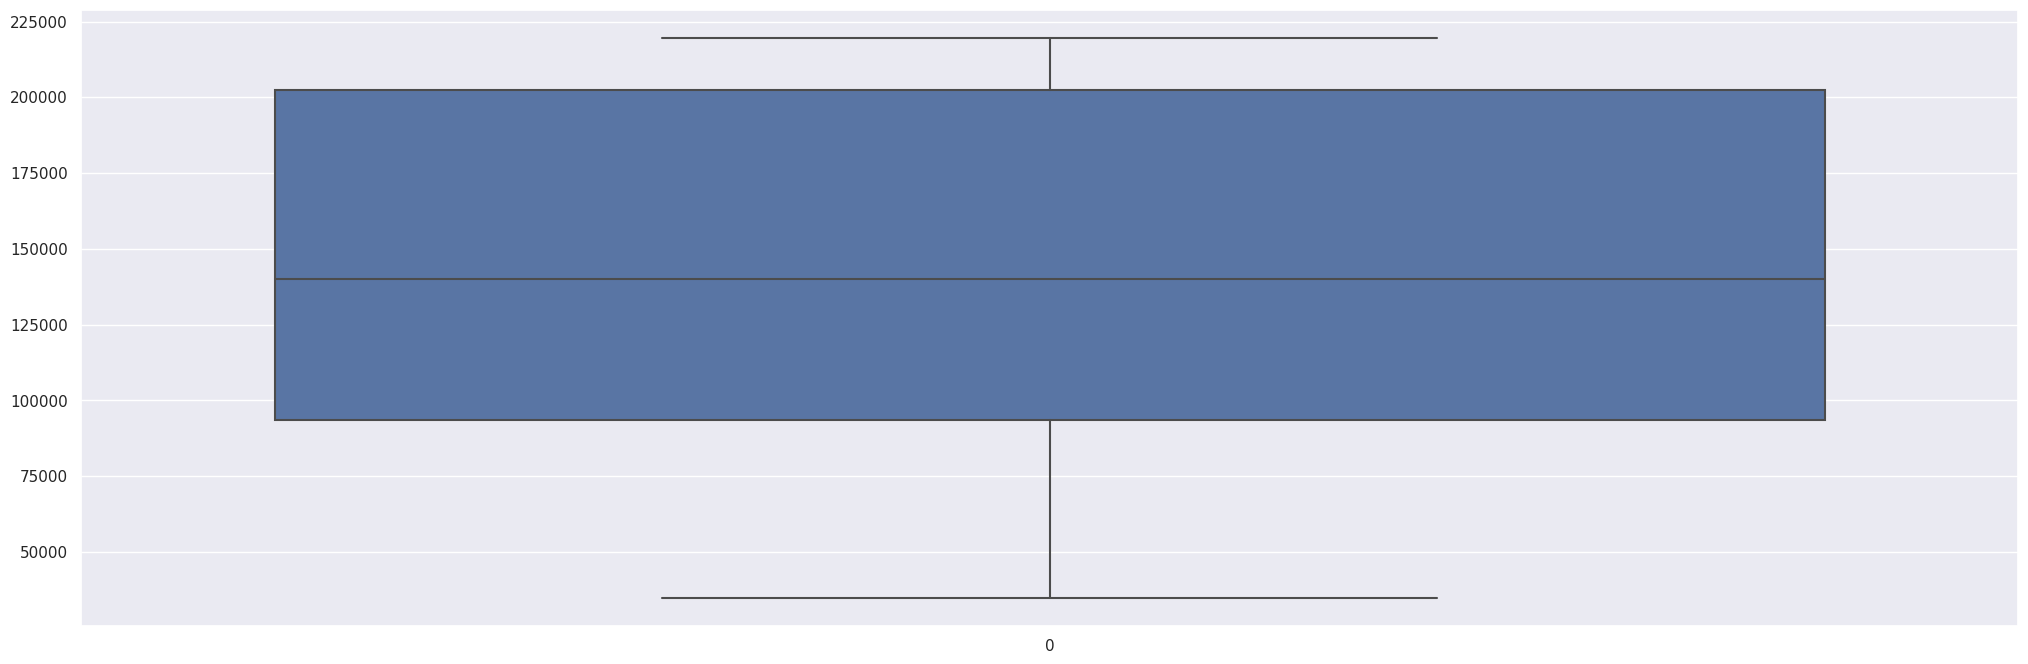

In [65]:
sns.boxplot(df3['Size'])

**Insight** - There are no outliers in the data.

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   
month         0.000134  0.000916      0.024981   0.332692     0.065848   
week          0.000188  0.000900      0.024427   0.329287     0.072608   

              Fuel_Price       CPI  U

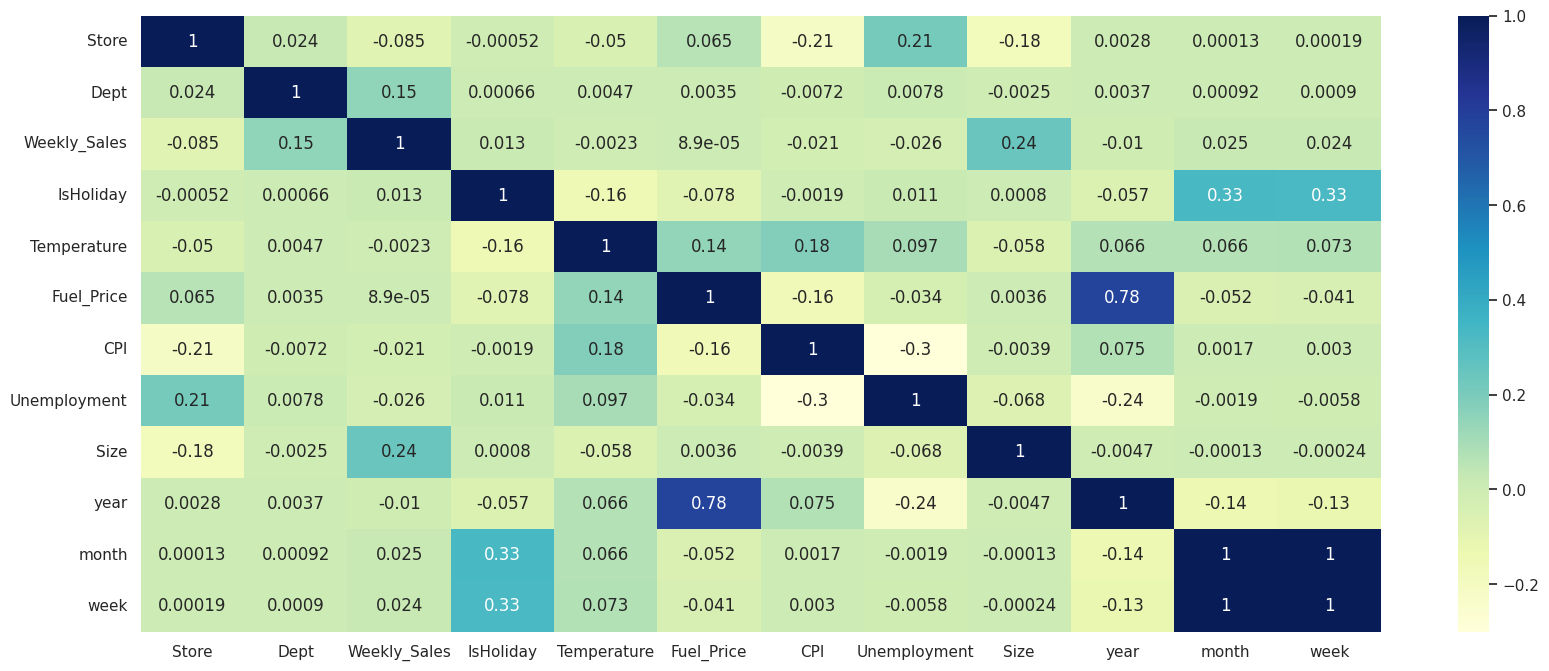

In [66]:
data = df4
#correlation matrix
plt.figure(figsize=(20,8))
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
plt.show()


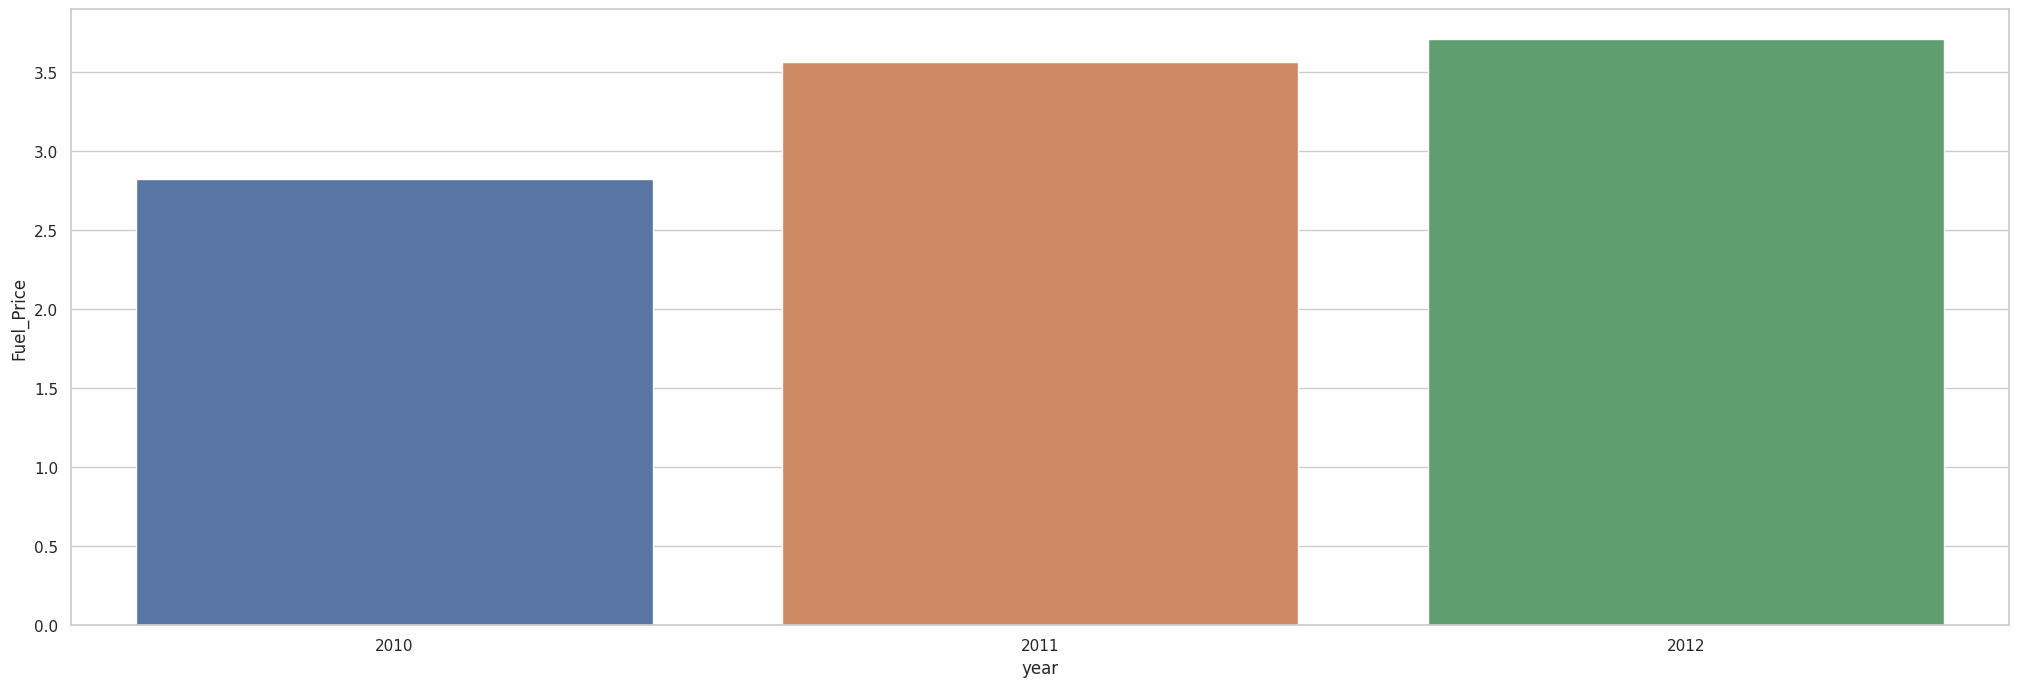

In [67]:
sns.set_theme(style="whitegrid")
tips =df4
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

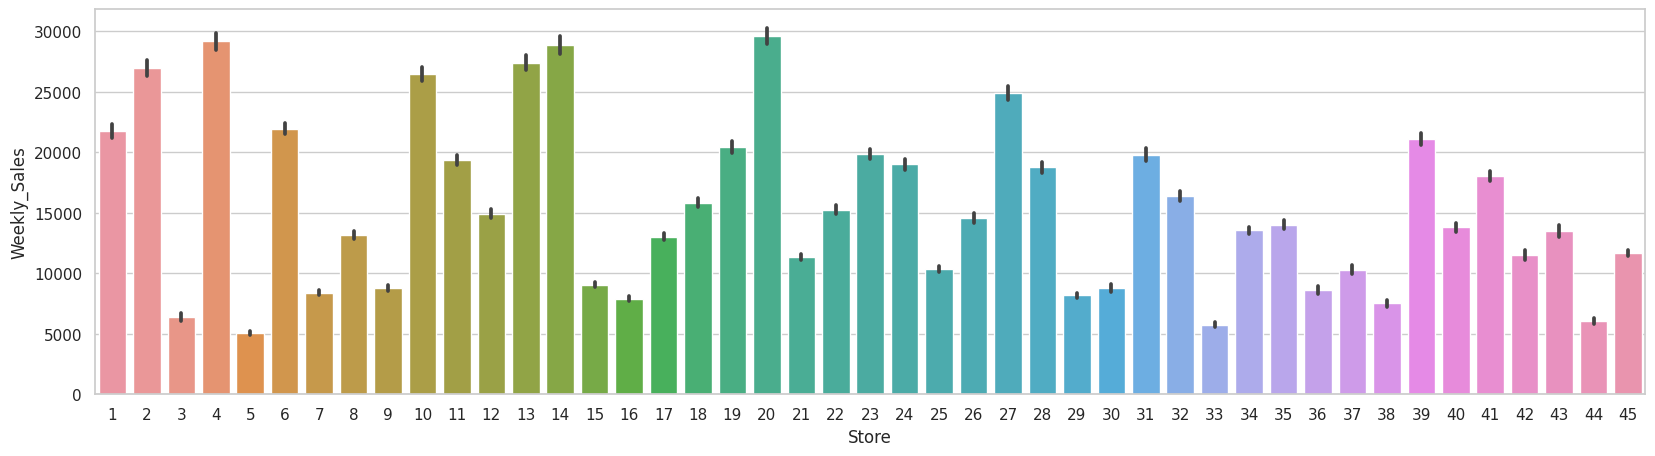

In [68]:
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
tips = df4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)
plt.show()

<Axes: xlabel='month'>

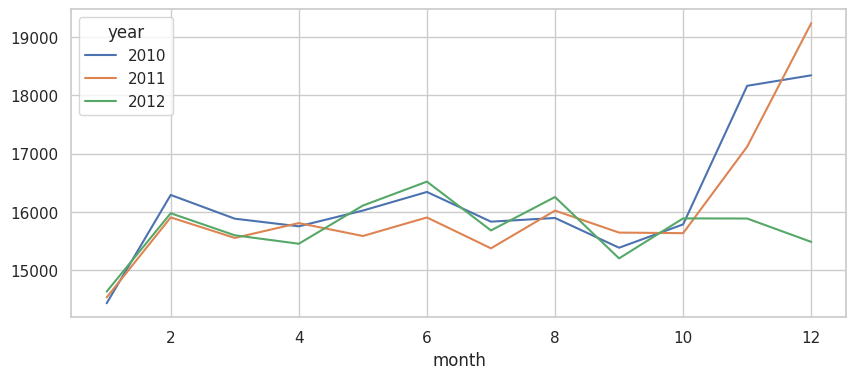

In [69]:
month_wise_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   
year          0.002831  0.003716     -0.010015  -0.056572     0.065712   
month         0.000134  0.000916      0.024981   0.332692     0.065848   
week          0.000188  0.000900      0.024427   0.329287     0.072608   

              Fuel_Price       CPI  U

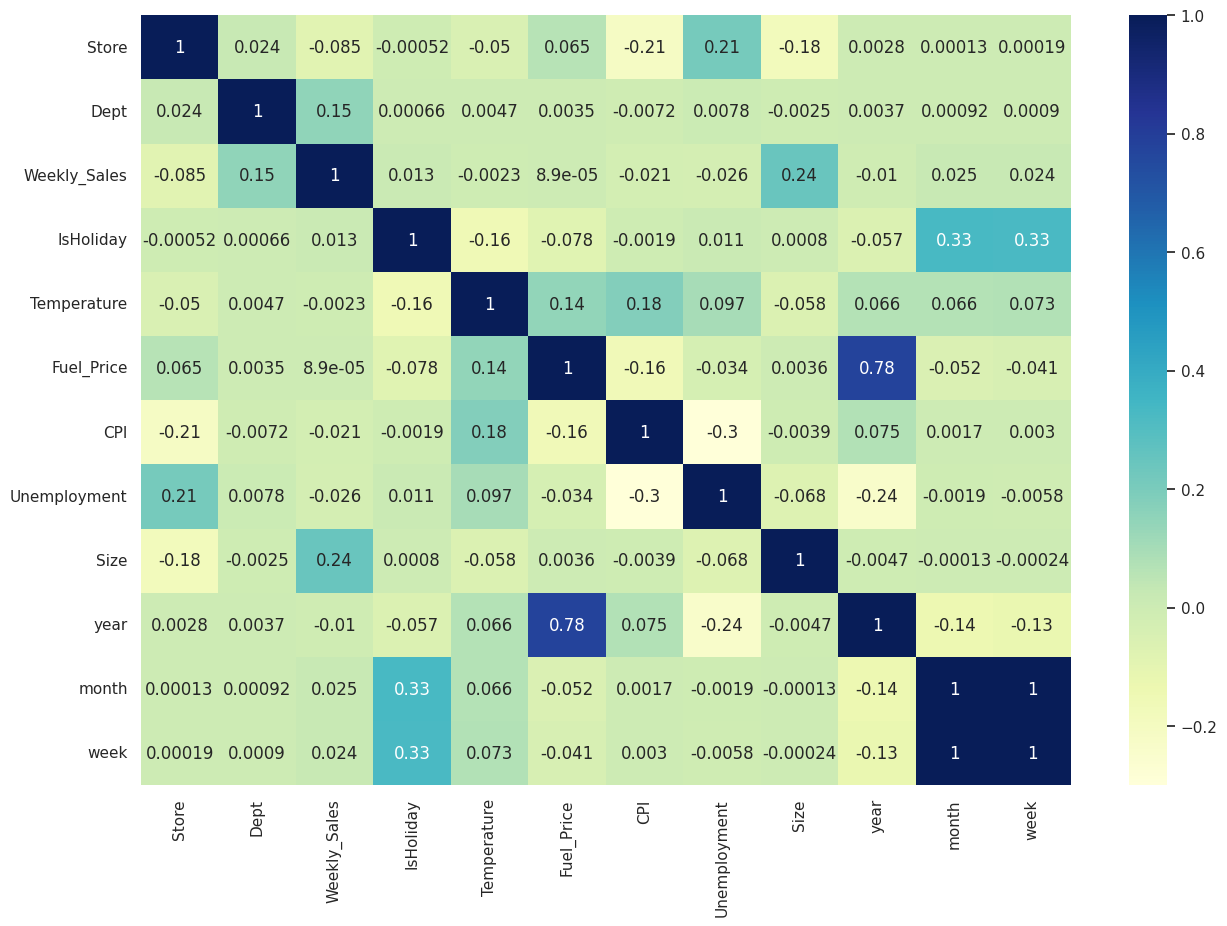

In [70]:
d = data
plt.figure(figsize=(15,10))
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
plt.show()


#**Model Building** - Building the model to predict weekly sales

In [71]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [76]:
d.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,05/02/2010,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010,5,17
1,1,1,12/02/2010,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,2010,12,48
2,1,1,19/02/2010,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,1,26/02/2010,19403.54,0,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,1,05/03/2010,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,2010,5,18


In [77]:
d.drop(['Date'],axis=1,inplace=True)

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d['Type'] = le.fit_transform(d['Type'])

In [79]:
d.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,5,19
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,12,50
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42
421569,45,98,1076.80,0,58.85,3.882,192.308899,8.667,1,118221,2012,10,43


In [80]:
x = d.drop('Weekly_Sales', axis=1)
y = d['Weekly_Sales']

In [81]:
x=x.drop(["IsHoliday",'year'],axis=1)

In [82]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [84]:
rf1.score(x_test,y_test)

0.8736473084822876

In [85]:
print("R2 score  :",r2_score(y_test, y_pred1))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.8736473084822876
MSE score  : 64541664.35934836
RMSE:  8033.782693062363


In [86]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
y_pred2 = model.predict(x_test)

In [88]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.9392648677216272
MSE score  : 31023846.625236724
RMSE:  5569.905441319154


In [89]:
model.score(x_test,y_test)

0.9392648677216272